In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, normalize

In [2]:
train_df = pd.read_csv("train.csv")
train_df

,ID,Material,Type,Shape,Coat/Functional Group,Synthesis_Method,Surface_Charge,Cell_Type,No_of_Cells (cells/well),Human_Animal,...,Cell_Morphology,Cell_Age,Cell Line_Primary Cell,Time (hr),Concentration (ug/ml),Test,Test_Indicator,Size,Zeta,Target
0,472,Pt,I,Sphere,PVP,Chemical Reduction,Negative,IMR90,5000.0,H,...,Fibroblast,Adult,L,24,25.0,CellTiterGlo,LuciferaseEnzyme,4.00,-8.00,1
1,232,Au,I,Sphere,CYS,Chemical Reduction,Negative,L929,5000.0,A,...,Fibroblast,Adult,L,24,50.0,MTT,TetrazoliumSalt,25.76,-46.80,1
2,2041,EudragitRL,O,Sphere,NaN,Emulsion-Solvent Evaporation,Positive,THP-1,5000.0,H,...,Monocyte,Adult,L,24,25.0,MTT,TetrazoliumSalt,142.00,56.00,1
3,437,Au,I,Sphere,Citrate,Chemical Reduction,Negative,Jurkat,500000.0,H,...,Lymphoblast,Adult,L,24,1.5,MTT,TetrazoliumSalt,7.00,-99.00,1
4,68,SLN,O,Sphere,NaN,Emulsion-Solvent Evaporation,Negative,A549,100000.0,H,...,Epithelial,Adult,L,24,3671.1,NRU,TetrazoliumSalt,98.40,-14.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,611,Dendrimer,O,Sphere,C12,Commercial,Positive,hNPC,100000.0,H,...,Neuronal,Embryonic,P,72,1.0,MTT,TetrazoliumSalt,4.50,54.47,1
1771,479,ZnO,I,Sphere,NaN,Commercial,Positive,HCMEC,50000.0,H,...,Epithelial,Adult,P,12,0.1,MTT,TetrazoliumSalt,45.30,32.70,1
1772,732,C70,C,Sphere,NaN,Commercial,Negative,V79,10000.0,A,...,Fibroblast,Adult,L,24,5.0,MTT,TetrazoliumSalt,57.00,-35.00,1
1773,1184,Polystyrene,O,Sphere,COOH,Commercial,Negative,HeLa,5000.0,H,...,Epithelial,Adult,L,48,5.0,CCK-8,TetrazoliumSalt,50.00,-9.00,1


C:\Users\tanth\AppData\Local\Temp\ipykernel_26696\534588442.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\tanth\AppData\Local\Temp\ipykernel_26696\534588442.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\tanth\AppData\Local\Temp\ipykernel_26696\534588442.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\tanth\AppData\Local\Temp\ipykernel_26696\534588442.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\tanth\AppDa

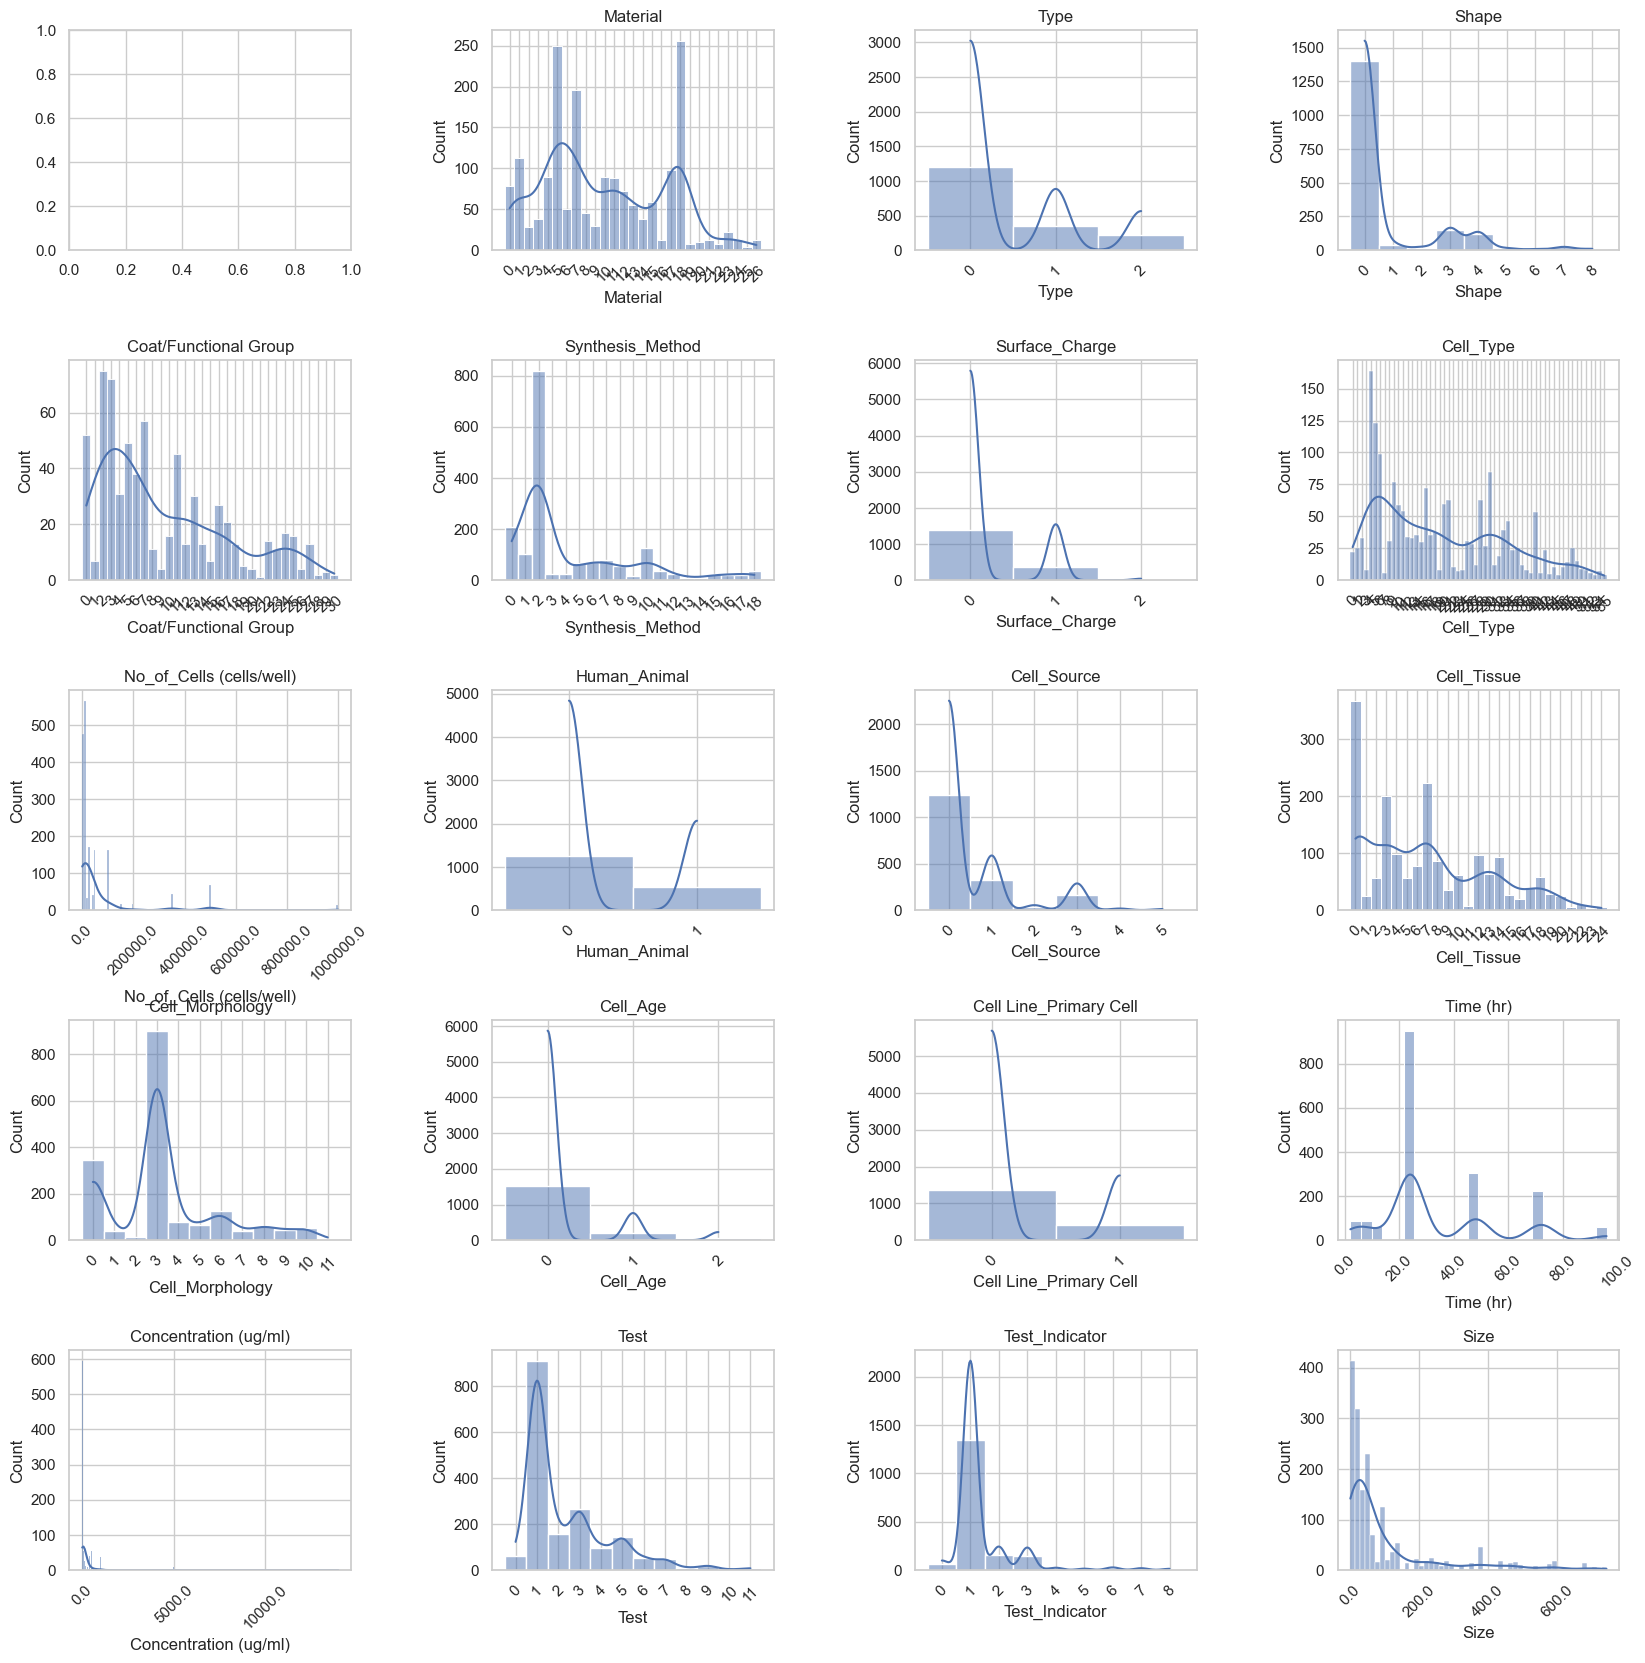

In [26]:
# There are 1 ID column, 20 feature columns and 1 target column. Plot their distributions onto a grid. Set the x values to be 90 degree to avoid overlapping. The ID and target column is the first and last column in the dataframe respectively.
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, ax in enumerate(axes.flatten()):
    if i == 0 or i == 20:
        continue
    sns.histplot(data=train_df, x=train_df.columns[i], ax=ax, kde=True)
    ax.set_title(train_df.columns[i])
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
plt.show()

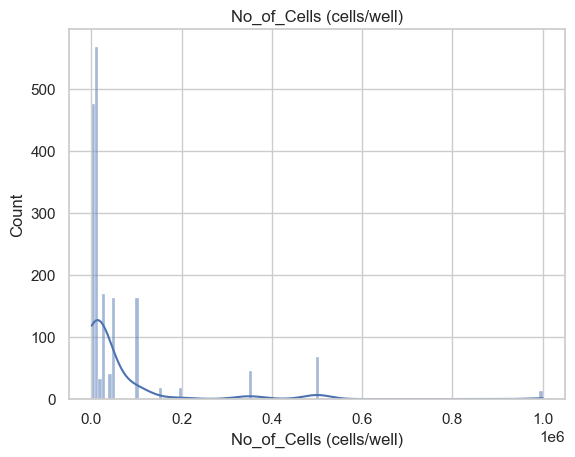

In [31]:
# Plot the distribution of a numerical column.
numerical_col = "No_of_Cells (cells/well)"
sns.histplot(data=train_df, x=numerical_col, kde=True)
plt.title(numerical_col)
plt.show()

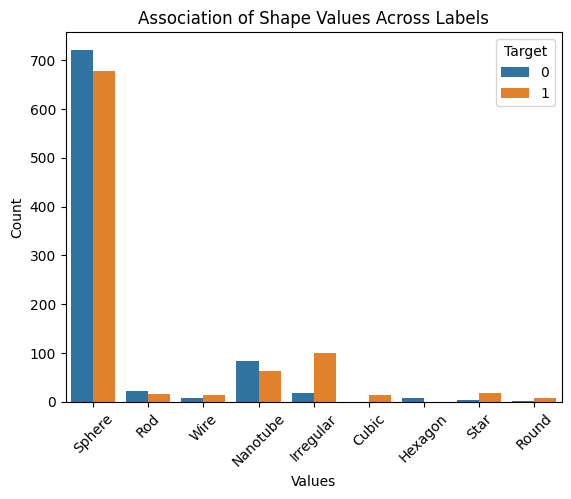

In [3]:
# Assuming `df` is your dataset, with 'feature_i' as the categorical feature and 'label' as the binary label column.
column = 'Shape'
sns.countplot(data=train_df, x=column, hue='Target')
plt.title(f'Association of {column} Values Across Labels')
plt.xlabel('Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()